# Iris Flower  Classification
*A data science project by Harish Julapalli*

## Overview
- Defining the problem
- Exploratory Data Analysis (EDA) and Visualizations
- Training and Testing Machine Learning models
- A Final Note
- References

## 1) Defining the dataset and problem


<p>The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper 'The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis'. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".</p>
<p>The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.</p>

__Problem statement:__
<p>For given features petal length, petal width ,sepal length and sepal width,all in centimeters, predict to which class the flower belongs to.</p>

<p>The data set can be found <a href = https://archive.ics.uci.edu/ml/machine-learning-databases/iris/>here.</a>

### Step-by-step approach for classifying Iris flowers

#### Importing the required libraries for loading and analysis of the data

In [1]:
#Loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv("iris.csv",names = names)

#### Quick examination of the dataset:

In [3]:
iris.shape

(150, 5)

In [4]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### Data set description:
<body>
<p>The data set consists of 150 examples of different Iris flowers. And there are 50 examples for each of the flower species.</p>
<p>There are four independent variables: sepal-length, sepal-width, petal-length, petal-width.</p>
<p>The target variable is the 'class', which we have to predict.</p>
</body>

#### Below is the basic description of the dataset:

In [6]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2) Exploratory data analysis and Data Visualization

In [7]:
iris.head(5)


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


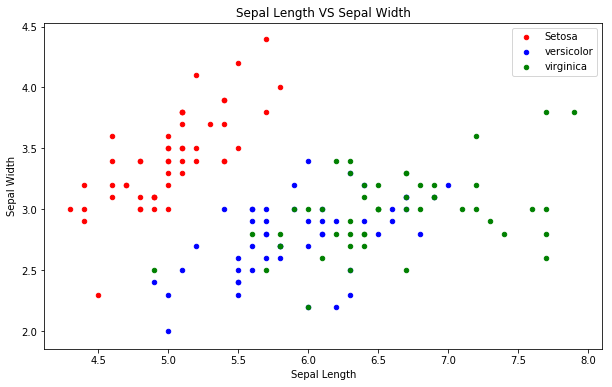

In [8]:
fig = iris[iris['class'] == 'Iris-setosa'].plot(kind = 'scatter', x = 'sepal-length',y='sepal-width', color = 'red', label = 'Setosa')
iris[iris['class'] == 'Iris-versicolor'].plot(kind = 'scatter', x = 'sepal-length',y='sepal-width', color = 'blue', label = 'versicolor', ax = fig)
iris[iris['class'] == 'Iris-virginica'].plot(kind = 'scatter', x = 'sepal-length',y='sepal-width', color = 'green', label = 'virginica', ax = fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Sepal Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<p>The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.</p>

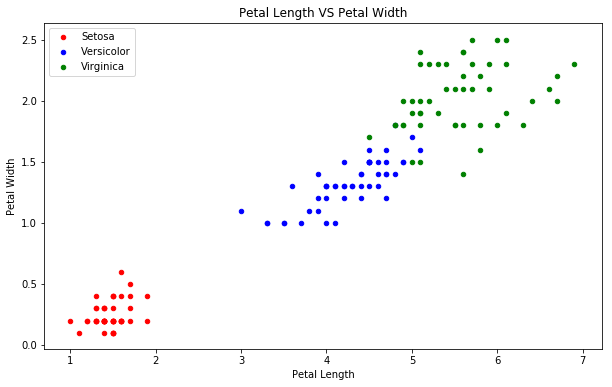

In [9]:
fig = iris[iris['class'] == 'Iris-setosa'].plot(kind = 'scatter', x = 'petal-length',y='petal-width', color = 'red', label = 'Setosa')
iris[iris['class'] == 'Iris-versicolor'].plot(kind = 'scatter', x = 'petal-length',y='petal-width', color = 'blue', label = 'Versicolor', ax = fig)
iris[iris['class'] == 'Iris-virginica'].plot(kind = 'scatter', x = 'petal-length',y='petal-width', color = 'green', label = 'Virginica', ax = fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Petal Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<p>Petal features among the three Iris Species are more linearly seperables than sepal fetures.This is an indication that the Petals can help in better and accurate Predictions over the Sepal. </p>

__Data Distribution__
<p>Now let us explore how data is distributed across various faetures.</p>

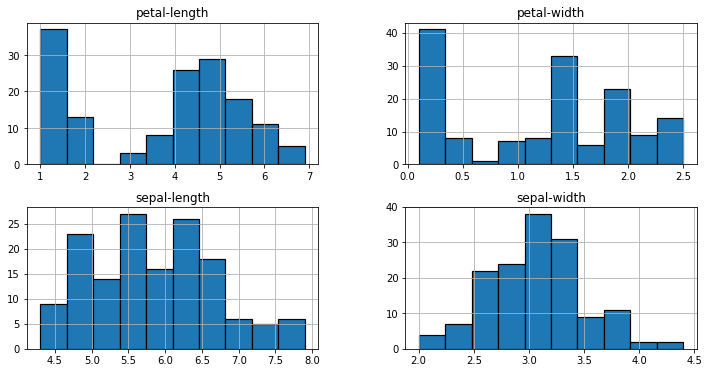

In [10]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

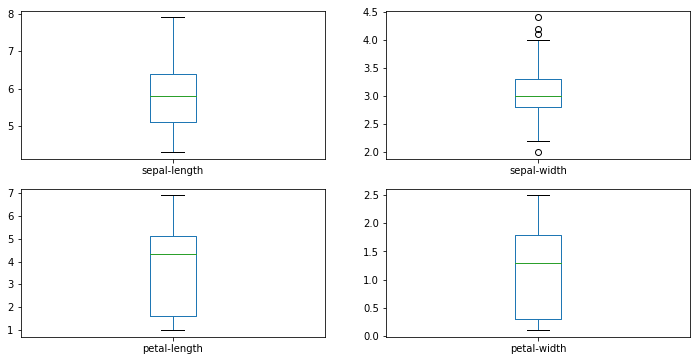

In [11]:
iris.plot(kind = 'box', subplots = True, layout = (2,2), sharex=False, sharey=False)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

## 3) Training and testing Machine Learning models

<p>The given problem is a classification problem. Now let us build various models like Logistic Regression, Descison Trees, K Nearest neigghbours etc. and verify its performance on our test set<p>

<p>Let us split our data into training and test sets, with 80% of our data going to test set.</p>

In [12]:
from sklearn import model_selection
df = iris.values
X = df[:,0:4]
y = df[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X,y, test_size = validation_size, random_state = seed)

In [13]:
#Test options and evaluation metrics
seed = 7
scoring = 'accuracy'

<p>Importing all the required classifiers and various evaluation metrics form Scikit learn and train our models.</p>

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

<p>Since our dataset is very small, it would be difficult to obtain both validation and training sets. So, it would be much better to perform k-fold cross-validation.</p>

In [15]:
#Create a list of models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

#evaluate each model with 10 fold cross-validation
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: Mean -> {cv_results.mean()}, std -> {cv_results.std()}"
    print(msg)

LR: Mean -> 0.9666666666666666, std -> 0.04082482904638632
LDA: Mean -> 0.975, std -> 0.03818813079129868
KNN: Mean -> 0.9833333333333332, std -> 0.03333333333333335
CART: Mean -> 0.975, std -> 0.03818813079129868
NB: Mean -> 0.975, std -> 0.053359368645273735
SVM: Mean -> 0.9916666666666666, std -> 0.025000000000000012


<p>Now let us compare our models:</p>

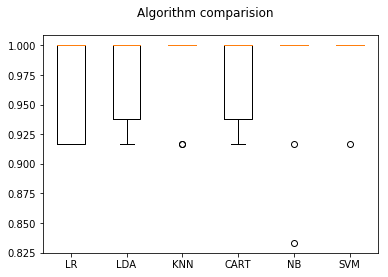

In [16]:
#Compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

<p>From the above results it is very clear that, KNN model has the highest accuracy among others.</p>

<p>Now it's time to test our models with the test data.</p>

In [17]:
#using KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_validation)
print(accuracy_score(y_validation,pred))

0.9


<p>Our model gave an accuracy of about 90% on our test data.</p>

<p>Now let us build Confusion matrix on our predictions.</p>

In [18]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_validation, pred)
print(cm)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                7                0               0        7
Iris-versicolor            0               11               1       12
Iris-virginica             0                2               9       11
__all__                    7               13              10       30


In [19]:
cm.print_stats()

Confusion Matrix:

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                7                0               0        7
Iris-versicolor            0               11               1       12
Iris-virginica             0                2               9       11
__all__                    7               13              10       30


Overall Statistics:

Accuracy: 0.9
95% CI: (0.7347115495257919, 0.9788828629702774)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.2551077165360814e-07
Kappa: 0.8461538461538461
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                               Iris-setosa Iris-versicolor  \
Population                                     30              30   
P: Condition positive                           7              12   
N: Condition negative                          23              18   
Test outcome positive                          

C:\Users\hj00434741\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
C:\Users\hj00434741\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


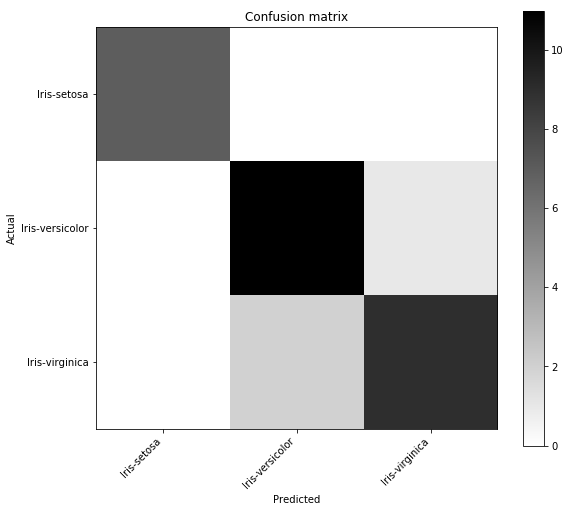

In [20]:
cm.plot()

## 4) Final Note

<p>Hope you find this simple project on Multi class classification helpful.Made me understand what more I need to work on. In the process I have learnt:</p>
<li>
To Apply Machine Learning basics studied in courses and text books.
</li>
<li>
Metrics to measure the goodness of the model. 
</li>

## 5) References
<br>
<li>Udacity - Intro to Machine Learning</li>
<li>Machine Learning Mastery blog</li>
<li><a href = https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb>This sample Notebook on git hub</a></li>